In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/content/loan_application.csv')
df.head()

,Unnamed: 0,Age,Income,CreditScore,Employment,MaritalStatus,ApplicationApproved
0,0,64.0,NaN,757.0,Retired,Single,1
1,1,54.0,100336.80,775.0,Self_Employed,Widowed,1
2,2,74.0,54004.19,806.0,Retired,Divorced,0
3,3,64.0,67621.44,727.0,Self_Employed,Divorced,0
4,4,33.0,36776.34,623.0,Employed_PartTime,NaN,0


In [3]:
# Removing the unamed column
df = df.iloc[:,1:]

In [4]:
# Working on subset of data (only numeric col)
num_df = df[['Age','Income','CreditScore','ApplicationApproved']]

In [5]:
num_df

,Age,Income,CreditScore,ApplicationApproved
0,64.0,NaN,757.0,1
1,54.0,100336.80,775.0,1
2,74.0,54004.19,806.0,0
3,64.0,67621.44,727.0,0
4,33.0,36776.34,623.0,0
...,...,...,...,...
99995,36.0,62506.85,764.0,1
99996,NaN,115114.01,802.0,1
99997,59.0,93125.83,785.0,1
99998,38.0,55967.83,757.0,1


# Filling Missing Values using Mean

In [6]:
X = num_df.iloc[:,:3]
y = num_df['ApplicationApproved']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=24)

In [8]:
# Using Pandas
X_train_trans = X_train.fillna(X.mean())
X_test_trans = X_test.fillna(X_test.mean())

In [9]:
# using sklearn
ct = ColumnTransformer([
    ('mean_imputation',SimpleImputer(strategy='mean'),X_train.columns)
])

In [10]:
X_train_mean = ct.fit_transform(X_train)
X_test_mean = ct.transform(X_test)

In [11]:
lr = LogisticRegression()
lr.fit(X_train_mean,y_train)
y_pred = lr.predict(X_test_mean)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
accuracy_score(y_test,y_pred)

0.80625

# Filling Missing Values using Median

In [13]:
ct1 = ColumnTransformer([
    ('median_imputation',SimpleImputer(strategy='median'),X_train.columns)
])

In [14]:
X_train_median = ct1.fit_transform(X_train)
X_test_median = ct1.transform(X_test)

In [15]:
lr = LogisticRegression()
lr.fit(X_train_median,y_train)
y_pred = lr.predict(X_test_median)

In [16]:
accuracy_score(y_test,y_pred)

0.80615

# Filling Missing Value using Arbitrary Value (Random Value)

In [17]:
X_train_arb = X_train.copy()
X_test_arb = X_test.copy()

In [18]:
X_train_arb['Age'] = X_train_arb['Age'].fillna(99)
X_train_arb['Income'] = X_train_arb['Income'].fillna(-1)
X_train_arb['CreditScore'] = X_train_arb['CreditScore'].fillna(999)

X_test_arb['Age'] = X_test_arb['Age'].fillna(99)
X_test_arb['Income'] = X_test_arb['Income'].fillna(-1)
X_test_arb['CreditScore'] = X_test_arb['CreditScore'].fillna(999)

Text(0.5, 1.0, 'After Arbitrary value')

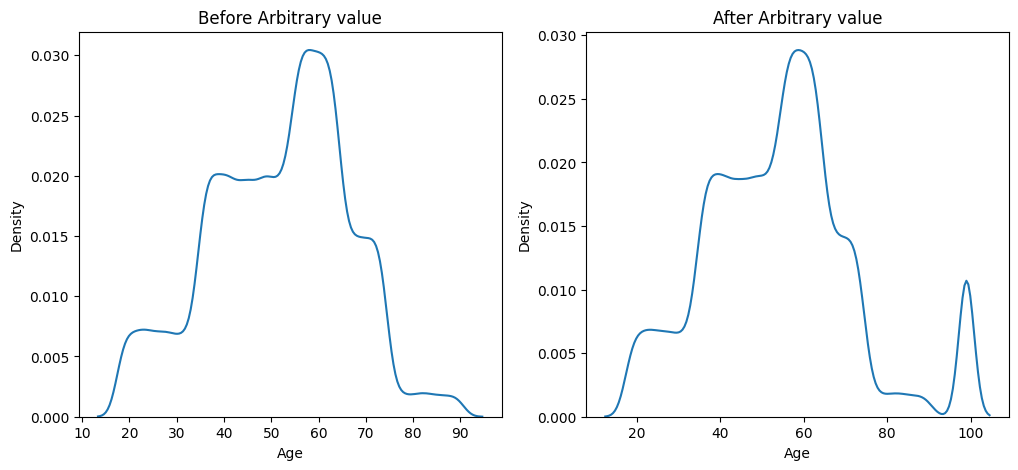

In [19]:
figure = plt.figure(figsize=(12,5))

plt.subplot(121)
sns.kdeplot(X_train['Age'])
plt.title('Before Arbitrary value')

plt.subplot(122)
sns.kdeplot(X_train_arb['Age'])
plt.title('After Arbitrary value')

Text(0.5, 1.0, 'After Arbitrary value')

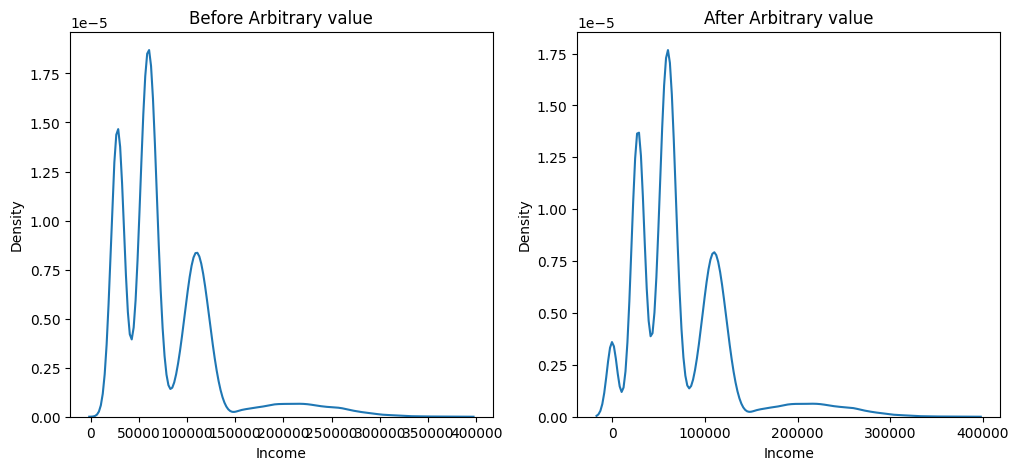

In [20]:
figure = plt.figure(figsize=(12,5))

plt.subplot(121)
sns.kdeplot(X_train['Income'])
plt.title('Before Arbitrary value')

plt.subplot(122)
sns.kdeplot(X_train_arb['Income'])
plt.title('After Arbitrary value')

Text(0.5, 1.0, 'After Arbitrary value')

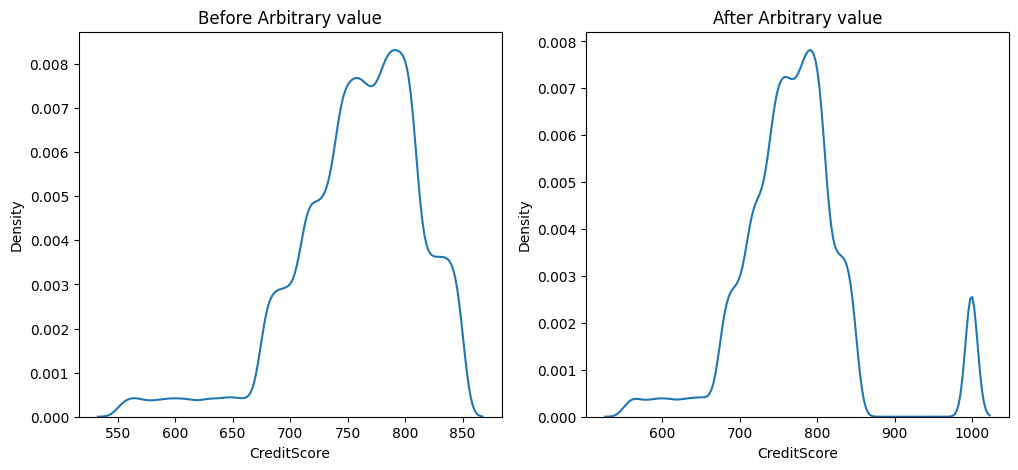

In [21]:
figure = plt.figure(figsize=(12,5))

plt.subplot(121)
sns.kdeplot(X_train['CreditScore'])
plt.title('Before Arbitrary value')

plt.subplot(122)
sns.kdeplot(X_train_arb['CreditScore'])
plt.title('After Arbitrary value')

# Filling Missing Value using End of Distribution Value

In [22]:
X_train_end = X_train.copy()
X_test_end = X_test.copy()

In [23]:
X_train_end['Age'] = X_train_end['Age'].fillna(X_train_end['Age'].max())
X_train_end['Income'] = X_train_end['Income'].fillna(X_train_end['Income'].max())
X_train_end['CreditScore'] = X_train_end['CreditScore'].fillna(X_train_end['CreditScore'].max())

X_test_end['Age'] = X_test_end['Age'].fillna(X_test_end['Age'].max())
X_test_end['Income'] = X_test_end['Income'].fillna(X_test_end['Income'].max())
X_test_end['CreditScore'] = X_test_end['CreditScore'].fillna(X_test_end['CreditScore'].max())

Text(0.5, 1.0, 'After End of Distribution value')

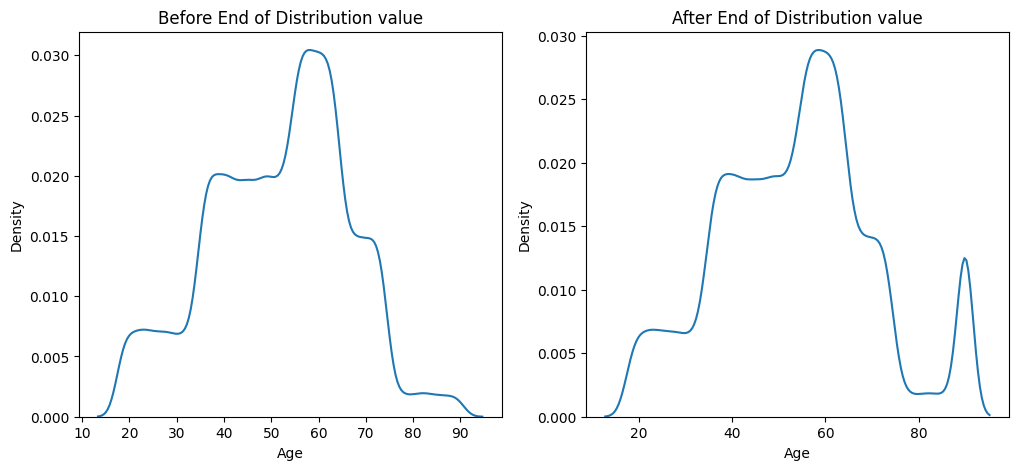

In [27]:
figure = plt.figure(figsize=(12,5))

plt.subplot(121)
sns.kdeplot(X_train['Age'])
plt.title('Before End of Distribution value')

plt.subplot(122)
sns.kdeplot(X_train_end['Age'])
plt.title('After End of Distribution value')

Text(0.5, 1.0, 'After End of Distribution value')

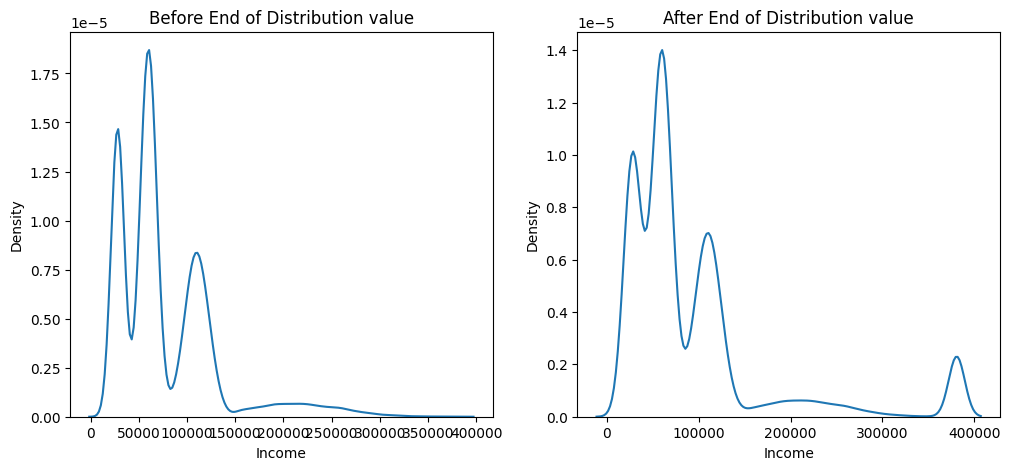

In [25]:
figure = plt.figure(figsize=(12,5))

plt.subplot(121)
sns.kdeplot(X_train['Income'])
plt.title('Before End of Distribution value')

plt.subplot(122)
sns.kdeplot(X_train_end['Income'])
plt.title('After End of Distribution value')

Text(0.5, 1.0, 'After End of Distribution value')

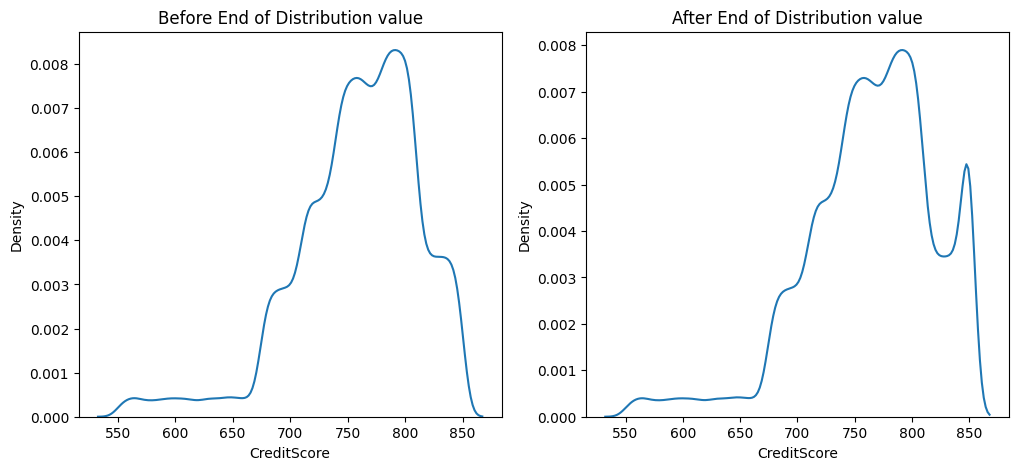

In [26]:
figure = plt.figure(figsize=(12,5))

plt.subplot(121)
sns.kdeplot(X_train['CreditScore'])
plt.title('Before End of Distribution value')

plt.subplot(122)
sns.kdeplot(X_train_end['CreditScore'])
plt.title('After End of Distribution value')

# Missing Indicator (Add a boolean column at the end to distinction of Nan and filled values)

In [28]:
# using sklearn Missing Indicator Class
from sklearn.impute import MissingIndicator
mi = MissingIndicator()
X_train_mi = mi.fit_transform(X_train)
X_test_mi = mi.transform(X_test)

In [35]:
pd.DataFrame(np.hstack((X_train.values,X_train_mi)),columns=['Age','Income','CreditScore','Age_NA','Income_NA','CreditScore_NA'])

,Age,Income,CreditScore,Age_NA,Income_NA,CreditScore_NA
0,54.0,293909.09,748.0,0.0,0.0,0.0
1,41.0,56805.48,805.0,0.0,0.0,0.0
2,19.0,56923.06,791.0,0.0,0.0,0.0
3,49.0,33770.93,809.0,0.0,0.0,0.0
4,79.0,65866.32,768.0,0.0,0.0,0.0
...,...,...,...,...,...,...
79995,59.0,26421.50,774.0,0.0,0.0,0.0
79996,51.0,98393.38,713.0,0.0,0.0,0.0
79997,72.0,118499.84,576.0,0.0,0.0,0.0
79998,37.0,24107.84,791.0,0.0,0.0,0.0


In [36]:
# using sklearn Simple Imputation
si = SimpleImputer(add_indicator=True)
X_train_mi = si.fit_transform(X_train)
X_test_mi = si.transform(X_test)

In [39]:
# Simple Imputator
lr = LogisticRegression()
lr.fit(X_train_mean,y_train)
y_pred1 = lr.predict(X_test_mean)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
accuracy_score(y_test,y_pred1)

0.80625

In [41]:
# Simple Impuator with add_indicator=True
lr = LogisticRegression()
lr.fit(X_train_mi,y_train)
y_pred2 = lr.predict(X_test_mi)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
accuracy_score(y_test,y_pred2)

0.8048